<a href="https://colab.research.google.com/github/Sreyosee/Machine-Learning-Tasks/blob/main/Task2_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task2: Customer Segmentation

#Library Impport

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

#Load Dataset

In [4]:
df = pd.read_csv("/content/Mall_Customers.csv")
print("Dataset Preview:")
print(df.head())
print("\nInfo:")
print(df.info())

Dataset Preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


# Select Features (Annual Income & Spending Score)

In [5]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scaling (optional but improves clustering)

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to Find Optimal K

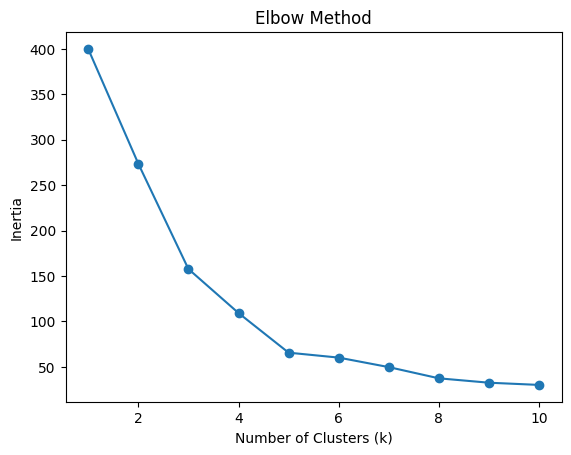

In [8]:
inertia = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Train Final KMeans Model (e.g., k=5)

In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = labels

# Evaluate Clustering

In [10]:
silhouette = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette:.3f}")

Silhouette Score: 0.555


# Visualization of Clusters

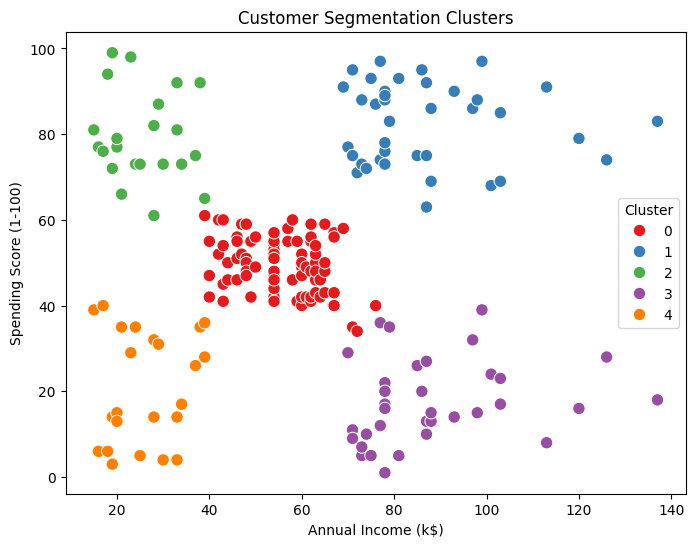

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='Set1',
    s=80
)
plt.title("Customer Segmentation Clusters")
plt.show()

# Bonus: DBSCAN clustering

In [12]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = labels


# Visualization of DBSCAN Clusters

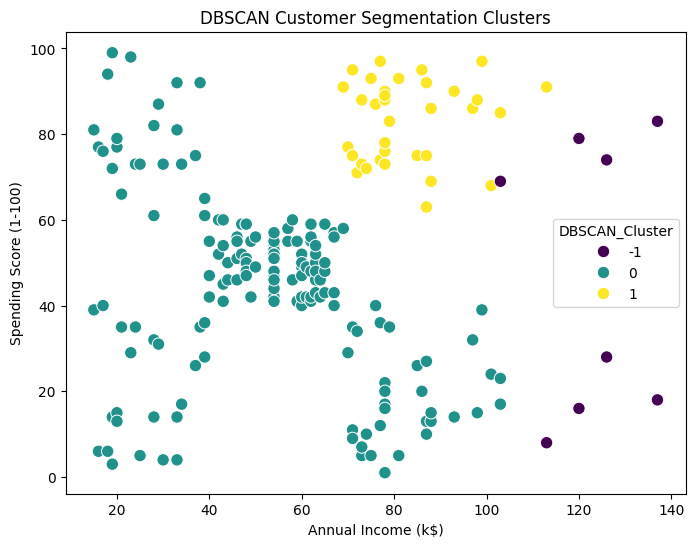

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', data=df, palette='viridis', s=80)
plt.title("DBSCAN Customer Segmentation Clusters")
plt.show()

# Analyze DBSCAN Clusters

In [18]:
print("DBSCAN Cluster Counts:")
print(df['DBSCAN_Cluster'].value_counts())

DBSCAN Cluster Counts:
DBSCAN_Cluster
 0    157
 1     35
-1      8
Name: count, dtype: int64


# Analyze average spending per cluster

In [19]:
print(df.groupby('Cluster')['Spending Score (1-100)'].mean())


Cluster
0    49.518519
1    82.128205
2    79.363636
3    17.114286
4    20.913043
Name: Spending Score (1-100), dtype: float64
